## Костюков Максим Сергеевич
Лабораторная работа номер 1
Введем начальные условия, узлы сетки и значения в них
Средствами sagemath введем переменую `x` и установим функцию

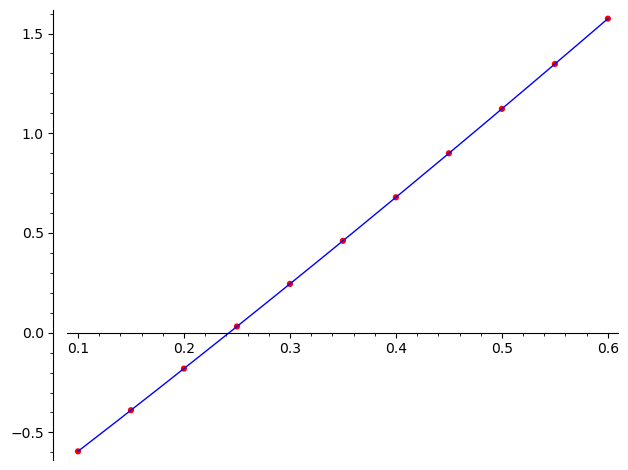

In [105]:
target_x = 0.37
left_border = 0.1
right_border = 0.6
steps_count = 10
step = (right_border - left_border)/steps_count
x_axis = [left_border + i * step for i in range(steps_count + 1)]


x = var('x')
y = 4*x-cos(x)

values = [y(x=i) for i in x_axis]
p = y.plot(xmin=left_border, xmax=right_border)
p += point(zip(x_axis, values), color='red', pointsize=20)
p.show()

Функция `lagrange` конструирует интерполяционный полином Лагранжа `n`-ого порядка.

In [106]:
def lagrange(n, values, nodes):
    assert len(nodes) - 1 == n
    polinomial = 0
    for i in range(len(nodes)):
        sum_element = values[nodes[i]]
        for j in range(0, len(nodes)):
            if i!=j:
                sum_element *= (x-x_axis[nodes[j]])/(x_axis[nodes[i]]-x_axis[nodes[j]])
        polinomial += sum_element
    return polinomial


In [107]:
closest_left_node = int((target_x - left_border) / step)
print(closest_left_node)

L1 = lagrange(1, values, [closest_left_node, closest_left_node+1])
L2 = lagrange(2, values, [closest_left_node-1,closest_left_node, closest_left_node+1])
print(L1)
print(L2)

5
4.36623437688987*x - 1.06755474475884
(20.0000000000000*x - 6.99999999999999)*(6.78939005997115*x - 2.03681701799135) + (-4.89327021748789*x + 1.71264457612076)*(-10.0000000000000*x + 4.00000000000000) + (9.21254574305243*x - 2.76376372291573)*(-20.0000000000000*x + 7.99999999999999)


In [108]:
R1 = diff(y, x, 2)*(target_x-x_axis[closest_left_node])*(target_x-x_axis[closest_left_node+1])/2

In [109]:
R2 = diff(y, x, 3)*(target_x-x_axis[closest_left_node-1])*(target_x-x_axis[closest_left_node])*(target_x-x_axis[closest_left_node+1])/6

In [110]:
mode = "point_minimum"
if mode == "minimum":
    R1_max = R1.find_local_maximum(x_axis[closest_left_node], x_axis[closest_left_node+1])[0]
    R1_min = R1.find_local_minimum(x_axis[closest_left_node], x_axis[closest_left_node+1])[0]
    R2_min = R2.find_local_minimum(x_axis[closest_left_node-1], x_axis[closest_left_node+1])[0]
    R2_max = R2.find_local_maximum(x_axis[closest_left_node-1], x_axis[closest_left_node+1])[0]
else:
    R1_max = max(R1(x=x_axis[closest_left_node]), R1(x=x_axis[closest_left_node+1]))
    R1_min = min(R1(x=x_axis[closest_left_node]), R1(x=x_axis[closest_left_node+1]))
    R2_max = max(R2(x=x_axis[closest_left_node-1]), R2(x=x_axis[closest_left_node]), R2(x=x_axis[closest_left_node+1]))
    R2_min = min(R2(x=x_axis[closest_left_node-1]), R2(x=x_axis[closest_left_node]), R2(x=x_axis[closest_left_node+1]))
print(R1_max, R1_min, R2_max, R2_min, sep = "\n")

-0.000276318298200866
-0.000281811813854214
2.72592839616056e-6
2.06864144662938e-6


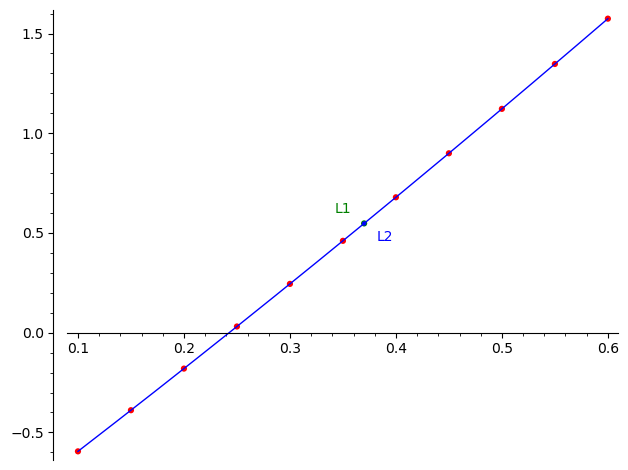

In [111]:
p += point((target_x, L1(x=target_x)), color='green', size=20)
p += text('L1', (target_x-0.02, L1(x=target_x)+0.07), color='green')
p += point((target_x, L2(x=target_x)), color='blue', size = 10)
p += text('L2', (target_x+0.02, L1(x=target_x)-0.07), color='blue')
p.show()

In [112]:
if R1_min <  y(x=target_x) - L1(x=target_x) < R1_max:
    print("Победа")

Победа


In [113]:
if R2_min < y(x=target_x) - L2(x=target_x) < R2_max:
    print("Победа")

Победа


In [114]:
def divdif():
    divdifs = [[None for i in range(len(x_axis)-i)] for i in range(len(x_axis))]
    def get_divdif(n, starting_point):
        if divdifs[starting_point][n] is not None:
            return divdifs[starting_point][n]
        if n == 0:
            return values[starting_point]
        divdifs[starting_point][n]=(get_divdif(n-1, starting_point)-get_divdif(n-1, starting_point + 1))/(x_axis[starting_point]-x_axis[starting_point+n])
        return divdifs[starting_point][n]
    return get_divdif

divdiffer = divdif()

In [115]:
def newton(n, starting_point):
    polinomial = 0
    for i in range(starting_point, starting_point+n+1):
        sum_element = divdiffer(i-starting_point, starting_point)
        for j in range(i-starting_point):
            sum_element *= (x-x_axis[starting_point+j])
        polinomial += sum_element
    return polinomial


In [116]:
N1 = newton(1, closest_left_node)
N2 = newton(2, closest_left_node-1)

In [120]:
print(f"\nПолином Ньютона первого порядка: {N1}\n")
print(f"\nПолином Ньютона второго порядка: {N2}\n")
print(f"\nПолином Лагранжа первого порядка: {L1}\n")
print(f"\nПолином Лагранжа второго порядка: {L2}\n")
print(f"При Ньютона использовании первого порядка: {N1(x=target_x)}")
print(f"При Ньютона использовании второго порядка: {N2(x=target_x)}")
print(f"При Лагранжа использовании второго порядка: {L1(x=target_x)}")
print(f"При Лагранжа использовании второго порядка: {L2(x=target_x)}")
print(f"Эталонное значние: {y(x=target_x)}")

print(f"L1-N1={L1(x=target_x)-N1(x=target_x)}")
print(f"L2-N2={L2(x=target_x)-N2(x=target_x)}")

print(f"Погрешность для полинома Ньютона первого порядка: {abs(N1(x=target_x)-y(x=target_x))}")
print(f"Погрешность для полинома Ньютона второго порядка: {abs(N2(x=target_x)-y(x=target_x))}")
print(f"Погрешность для полинома Лагранжа первого порядка: {abs(L1(x=target_x)-y(x=target_x))}")
print(f"Погрешность для полинома Лагранжа второго порядка: {abs(L2(x=target_x)-y(x=target_x))}")


Полином Ньютона первого порядка: 4.36623437688988*x - 1.06755474475884


Полином Ньютона второго порядка: (x - 0.350000000000000)*(0.469588513253330*x - 0.140876553975999) + 4.31927552556454*x - 1.05111914679497


Полином Лагранжа первого порядка: 4.36623437688987*x - 1.06755474475884


Полином Лагранжа второго порядка: (20.0000000000000*x - 6.99999999999999)*(6.78939005997115*x - 2.03681701799135) + (-4.89327021748789*x + 1.71264457612076)*(-10.0000000000000*x + 4.00000000000000) + (9.21254574305243*x - 2.76376372291573)*(-20.0000000000000*x + 7.99999999999999)

При Ньютона использовании первого порядка: 0.547951974690418
При Ньютона использовании второго порядка: 0.547670221582466
При Лагранжа использовании второго порядка: 0.547951974690418
При Лагранжа использовании второго порядка: 0.547670221582466
Эталонное значние: 0.547672654393966
L1-N1=-8.88178419700125e-16
L2-N2=-4.44089209850063e-16
Погрешность для полинома Ньютона первого порядка: 0.000279320296452945
Погрешность для пол

In [118]:
if abs(y(x=target_x) - L1(x=target_x)) <= 0.0001:
    print("Линейная интерплояция Лагранжем допустима")
else:
    print("Линейная интерплояция Лагранжем недопустима")

if abs(y(x=target_x) - N1(x=target_x)) <= 0.0001:
    print("Линейная интерплояция Ньютоном допустима")
else:
    print("Линейная интерплояция Ньютоном недопустима")

if abs(y(x=target_x) - L2(x=target_x)) <= 0.00001:
    print("Квадратичная интерплояция Лагранжем допустима")
else:
    print("Квадратичная интерплояция Лагранжем недопустима")

if abs(y(x=target_x) - N2(x=target_x)) <= 0.00001:
    print("Квадратичная интерплояция Ньютоном допустима")
else:
    print("Квадратичная интерплояция Ньютоном недопустима")

Линейная интерплояция Лагранжем недопустима
Линейная интерплояция Ньютоном недопустима
Квадратичная интерплояция Лагранжем допустима
Квадратичная интерплояция Ньютоном допустима


In [119]:
print(divdiffer(1, closest_left_node-1))
print(divdiffer(1, closest_left_node))

print()
print()
print()

print(divdiffer(2, closest_left_node-1))

4.31927552556454
4.36623437688988



0.469588513253330
